In [13]:
import torch
import matplotlib.pyplot as plt

In [14]:
x=torch.tensor([5.0,7.0,12.0,16.0,20.0])
y=torch.tensor([40.0,120.0,180.0,210.0,240.0])
learning_rate=torch.tensor(0.001)


In [15]:
class RegressionModel:
    def __init__(self):
        self.w=torch.rand([1],requires_grad=True)
        self.b=torch.rand([1],requires_grad=True)
    def forward(self,x):
        return self.w*x+self.b
    def update(self):
        self.w-=learning_rate*self.w.grad
        self.b-=learning_rate*self.b.grad
    def reset_grad(self):
        self.w.grad.zero_()
        self.b.grad.zero_()
def criterion(yj,y_p):
    return (yj-y_p)**2
        

tensor([4.5919], requires_grad=True) tensor([1.1602], requires_grad=True) 29279.66796875
tensor([7.5027], requires_grad=True) tensor([1.3637], requires_grad=True) 12602.701171875
tensor([9.3911], requires_grad=True) tensor([1.4969], requires_grad=True) 5583.73095703125
tensor([10.6160], requires_grad=True) tensor([1.5845], requires_grad=True) 2629.59716796875
tensor([11.4106], requires_grad=True) tensor([1.6426], requires_grad=True) 1386.26220703125
tensor([11.9260], requires_grad=True) tensor([1.6814], requires_grad=True) 862.9638671875
tensor([12.2603], requires_grad=True) tensor([1.7078], requires_grad=True) 642.7125854492188
tensor([12.4771], requires_grad=True) tensor([1.7262], requires_grad=True) 550.007080078125
tensor([12.6177], requires_grad=True) tensor([1.7393], requires_grad=True) 510.98236083984375
tensor([12.7088], requires_grad=True) tensor([1.7490], requires_grad=True) 494.5511169433594
tensor([12.7678], requires_grad=True) tensor([1.7565], requires_grad=True) 487.62866

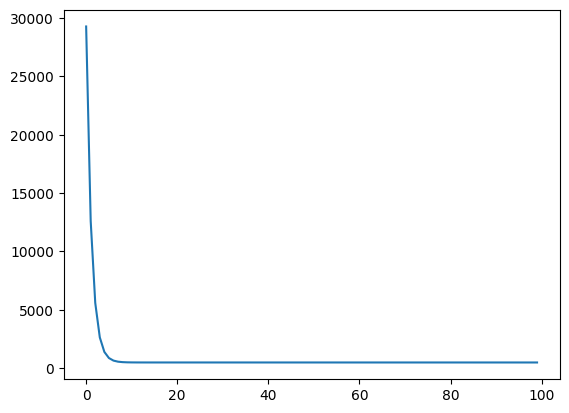

In [16]:
model=RegressionModel()
loss_list=[]
for epochs in range(100):
    loss=0.0
    for j in range(len(x)):
        y_p=model.forward(x[j])
        loss+=criterion(y[j],y_p)
    loss=loss/len(x)
    loss_list.append(loss.item())
    loss.backward()
    with torch.no_grad():
        model.update()
    model.reset_grad()
    print(model.w,model.b,loss.item())
plt.plot(loss_list)
plt.show()
    